In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')


plt.style.use('dark_background')
sns.set_style("whitegrid")
sns.set_palette("crest")
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.facecolor'] = '#111'
plt.rcParams['axes.facecolor'] = '#111'
plt.rcParams['text.color'] = '#eee'



In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print("Shape:", df.shape)
df.head()

Shape: (4363, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,22.0,263239938.0,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,0.0,15.0,318160860.0,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,184963586.0,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.0,0.0,11.0,259426821.0,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,208182236.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
df.dropna(subset=['County','Model Year', 'Electric Range','City','Postal Code','Legislative District','Vehicle Location','Electric Utility','2020 Census Tract'], inplace=True)
df = df[df['Electric Range'] > 0]

In [4]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [5]:
df['EV Type'] = df['Electric Vehicle Type'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

In [6]:
df['Year'] = df['Model Year']
print("Total Records after cleaning:", len(df))

Total Records after cleaning: 1831


In [7]:
total_evs = len(df)
avg_range = df['Electric Range'].mean()
brand_count = df['Make'].nunique()
bev_share = (df['EV Type'].value_counts(normalize=True).get('BEV', 0) * 100)

In [8]:
yearly_trend = df.groupby('Year').size().reset_index(name='Total EVs')

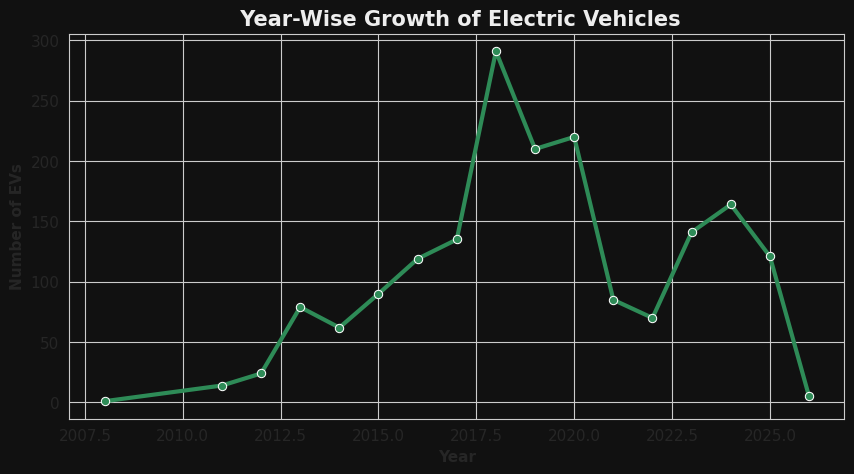

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Total EVs', data=yearly_trend,
             linewidth=3, marker='o', color='seagreen')
plt.title(" Year-Wise Growth of Electric Vehicles", fontsize=15, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of EVs")
plt.show()

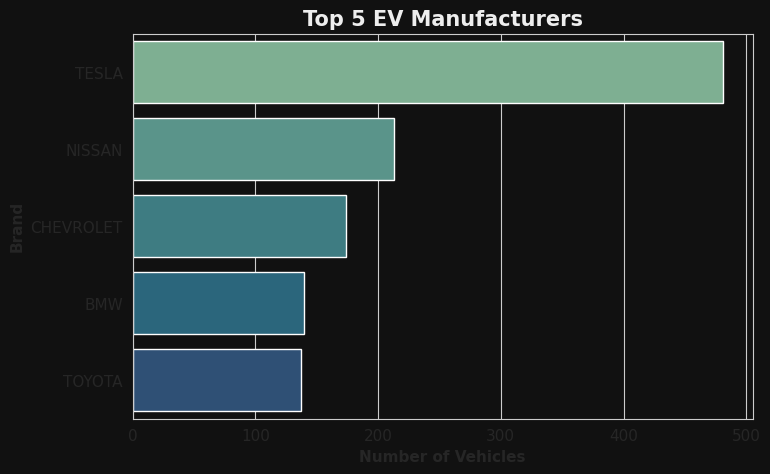

In [10]:
top_brands = df['Make'].value_counts().head(5).reset_index()
top_brands.columns = ['Make', 'Count']

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Make', data=top_brands, palette='crest')
plt.title("Top 5 EV Manufacturers", fontsize=15, fontweight='bold')
plt.xlabel("Number of Vehicles")
plt.ylabel("Brand")
plt.show()

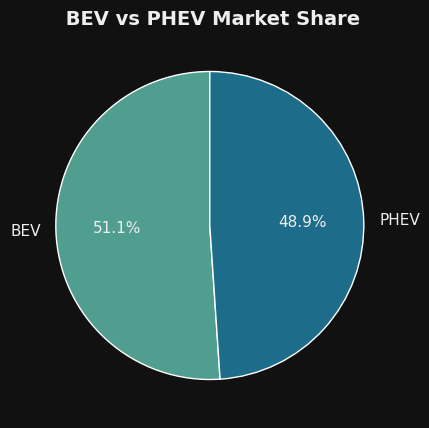

In [11]:
ev_type_share = df['EV Type'].value_counts()
colors = sns.color_palette("crest", len(ev_type_share))

plt.figure(figsize=(5,5))
plt.pie(ev_type_share, labels=ev_type_share.index, autopct='%1.1f%%',startangle=90, colors=colors)
plt.title(" BEV vs PHEV Market Share", fontsize=14, fontweight='bold')
plt.show()

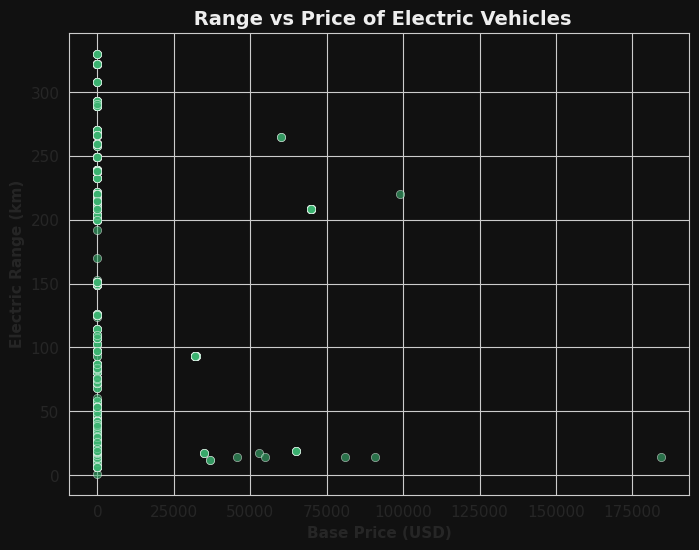

In [12]:
if 'Base MSRP' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Base MSRP', y='Electric Range', data=df,alpha=0.6, color='mediumseagreen')
    plt.title(" Range vs Price of Electric Vehicles", fontsize=14, fontweight='bold')
    plt.xlabel("Base Price (USD)")
    plt.ylabel("Electric Range (km)")
    plt.show()
else:
    print(" Price data not available in this dataset.")

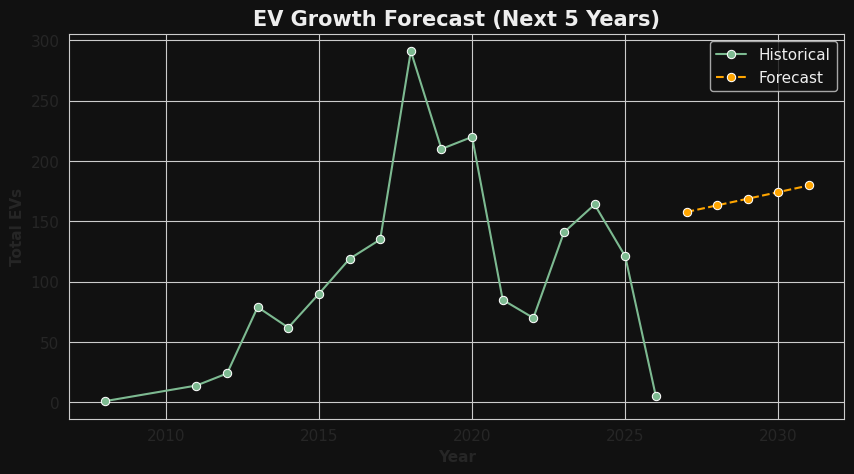

In [13]:
X = yearly_trend[['Year']]
y = yearly_trend['Total EVs']
model = LinearRegression().fit(X, y)
future_years = pd.DataFrame({'Year': range(df['Year'].max()+1, df['Year'].max()+6)})
future_years['Predicted EVs'] = model.predict(future_years)

forecast_df = pd.concat([yearly_trend, future_years], ignore_index=True)
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Total EVs', data=yearly_trend, label='Historical', marker='o')
sns.lineplot(x='Year', y='Predicted EVs', data=future_years, label='Forecast', linestyle='--', marker='o', color='orange')
plt.title("EV Growth Forecast (Next 5 Years)", fontsize=15, fontweight='bold')
plt.legend()
plt.show()

In [14]:
df.to_csv('cleaned_ev_data.csv', index=False)
forecast_df.to_csv('ev_forecast.csv', index=False)

print("✅ Cleaned datasets exported successfully!")
print("You can now import 'cleaned_ev_data.csv' and 'ev_forecast.csv' into Power BI to build your dashboard.")

✅ Cleaned datasets exported successfully!
You can now import 'cleaned_ev_data.csv' and 'ev_forecast.csv' into Power BI to build your dashboard.
